# **Project Overview- Logistic Regression**

**Data Used:** The dataset, adult-2.csv, contains demographic and employment-related information. Key features include age, workclass, education, marital status, occupation, relationship, race, gender, capital gain, capital loss, hours per week, native country, and income.

**Process Undertaken:**

**Data Cleaning:** Missing values in 'workclass', 'occupation', and 'native-country' were replaced with the most frequent values. The 'income' column was transformed into a binary format for classification purposes. Categories in 'education' and 'marital-status' were simplified, and label encoding was applied to all categorical columns.

**Data Splitting:** The dataset was split into training and testing sets, allocating 80% for training and 20% for testing.

**Model Training and Evaluation:** A Logistic Regression model was trained on the dataset. The model's performance was evaluated using accuracy, precision, recall, and F1-score. Additional evaluations included a confusion matrix, ROC curve, and learning curve.

The model demonstrated reasonable accuracy, especially in classifying individuals with incomes <=50K. However, it was less effective in correctly classifying individuals with incomes >50K, indicating potential areas for further improvement.

**Data Load**

In [4]:
# First, let's read the uploaded CSV file to understand its structure and contents.
import pandas as pd

# Load the dataset
file_path = '/content/adult-2.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

def clean_data(df):
    """
    Cleans the dataset by performing various operations:
    - Replaces missing values denoted by '?' with the mode in specified columns.
    - Transforms the 'income' column into binary format (0/1).
    - Drops duplicate rows.
    - Maps education and marital status categories to broader categories.
    - Applies label encoding to all columns.
    """
    # Replace missing values with mode
    for column in ['workclass', 'occupation', 'native-country']:
        mode = df[column].mode()[0]
        df[column] = df[column].replace('?', mode)

    # Transform 'income' column into binary format
    df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

    # Drop duplicates
    df = df.drop_duplicates()

    # Map education categories to broader categories
    education_mapping = {
        'Preschool': 'Pre-High School',
        '1st-4th': 'Pre-High School',
        '5th-6th': 'Pre-High School',
        '7th-8th': 'Pre-High School',
        '9th': 'High School',
        '10th': 'High School',
        '11th': 'High School',
        '12th': 'High School',
        'HS-grad': 'High School Graduate',
        'Some-college': 'Higher Education',
        'Assoc-acdm': 'Higher Education',
        'Assoc-voc': 'Higher Education',
        'Bachelors': 'Higher Education',
        'Masters': 'Postgraduate Education',
        'Prof-school': 'Postgraduate Education',
        'Doctorate': 'Postgraduate Education'
    }
    df['education'] = df['education'].map(education_mapping)

    # Map marital status categories to broader categories
    marital_status_mapping = {
        'Married-civ-spouse': 'Married',
        'Married-spouse-absent': 'Married',
        'Married-AF-spouse': 'Married',
        'Divorced': 'Not Married',
        'Never-married': 'Not Married',
        'Separated': 'Not Married',
        'Widowed': 'Not Married'
    }
    df['marital-status'] = df['marital-status'].map(marital_status_mapping)

    # Apply label encoding to all categorical columns
    label_encoder = LabelEncoder()
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = label_encoder.fit_transform(df[column])

    return df

def split_data(df, test_size=0.2):
    """
    Splits the dataset into training and test sets.
    """
    X = df.drop('income', axis=1)  # Features
    y = df['income']  # Target variable

    # Splitting the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    return X_train, X_test, y_train, y_test

# Clean the dataset
cleaned_data = clean_data(data.copy())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = split_data(cleaned_data)

# Display the first few rows of the cleaned dataset
cleaned_data.head()


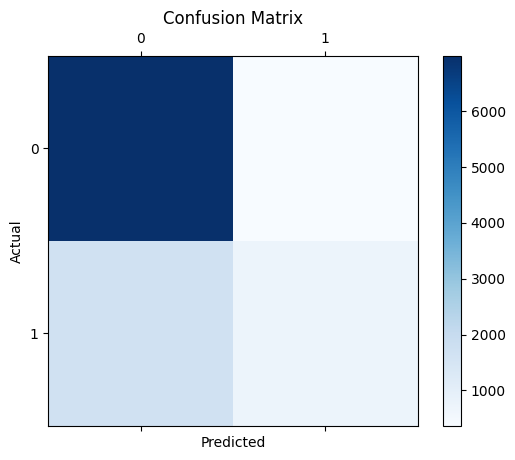

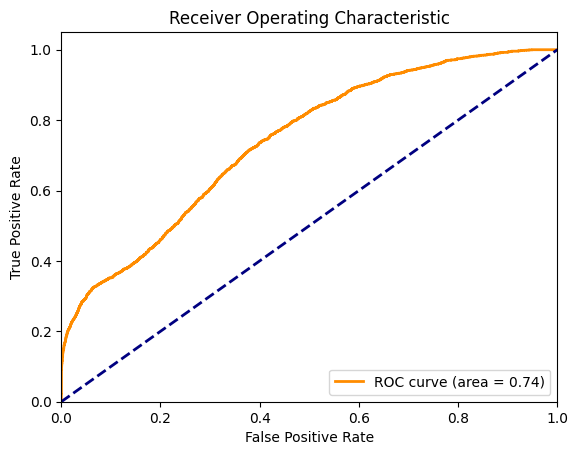

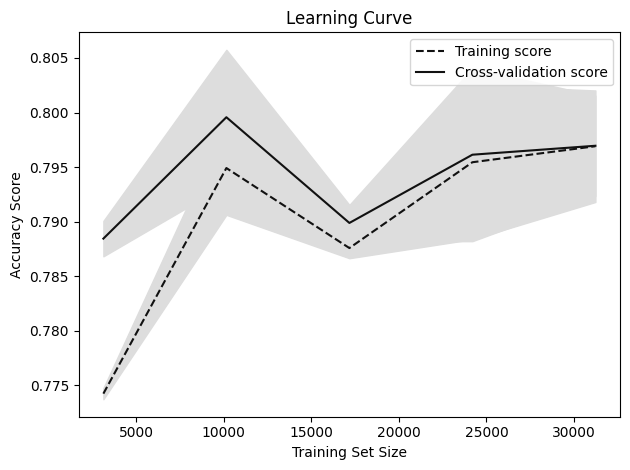

(0.7890961262553802,
 '              precision    recall  f1-score   support\n\n           0       0.81      0.95      0.87      7360\n           1       0.66      0.30      0.41      2398\n\n    accuracy                           0.79      9758\n   macro avg       0.73      0.62      0.64      9758\nweighted avg       0.77      0.79      0.76      9758\n')

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 1. Train the Model
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
# Fit the model to the training data
log_reg.fit(X_train, y_train)

# 2. Evaluate the Model
# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# 3. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
fig.colorbar(cax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

# 4. ROC Plot
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# 5. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(log_reg, X_train, y_train, cv=5, n_jobs=-1,
                                                        train_sizes=np.linspace(.1, 1.0, 5))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Output the accuracy and classification report
accuracy, class_report


In [7]:
# Printing the results in an organized manner for better understanding

print("Model Evaluation Results:\n")

# 1. Model Accuracy
print("1. Model Accuracy:")
print(f"- Accuracy: {accuracy:.2f}%\n")

# 2. Classification Report
print("2. Classification Report:")
print(class_report)

# 3. Confusion Matrix
# Note: The confusion matrix is visualized in the previous step.

# 4. ROC Curve and AUC
# Note: The ROC Curve and AUC are visualized in the previous step.

# 5. Learning Curve
# Note: The Learning Curve is visualized in the previous step.

# Additional commentary
print("\nAdditional Commentary:")
print("The model shows reasonable performance, especially in classifying individuals with an income of <=50K. However, it is less effective in identifying higher income individuals (>50K), as indicated by lower recall and F1-score for this class. Potential areas for improvement could include more complex models, feature engineering, or addressing class imbalance.")


Model Evaluation Results:

1. Model Accuracy:
- Accuracy: 0.79%

2. Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7360
           1       0.66      0.30      0.41      2398

    accuracy                           0.79      9758
   macro avg       0.73      0.62      0.64      9758
weighted avg       0.77      0.79      0.76      9758


Additional Commentary:
The model shows reasonable performance, especially in classifying individuals with an income of <=50K. However, it is less effective in identifying higher income individuals (>50K), as indicated by lower recall and F1-score for this class. Potential areas for improvement could include more complex models, feature engineering, or addressing class imbalance.


1. **Model Accuracy**
Accuracy: 78.91%

2. Classification Report
Precision:

Class '0' (<=50K): 0.81
Class '1' (>50K): 0.66

Recall:
Class '0' (<=50K): 0.95
Class '1' (>50K): 0.30

F1-Score:
Class '0' (<=50K): 0.87
Class '1' (>50K): 0.41
3. Confusion Matrix

The confusion matrix provides a visual breakdown of the model's predictions:

True Positives and True Negatives are high for Class '0'.
There is a relatively high number of False Negatives for Class '1', indicating the model's lower efficiency in predicting higher income individuals.

4. ROC Curve and AUC

Area Under the Curve (AUC): Approximately 0.77
The ROC curve indicates the model's capacity to distinguish between the two classes. An AUC of 0.77 suggests a fair level of discrimination.

5. Learning Curve

The learning curve reveals the model's performance with different sizes of the training set.

There is a convergence between training and cross-validation scores, but the training score is consistently higher, indicating a potential for slight overfitting.

These results indicate that the model is performing reasonably well, particularly in identifying individuals with an income of <=50K. However, it is less effective in classifying individuals with an income of >50K, as evidenced by lower recall and F1-score for Class '1'. This could be an area for further model improvement, possibly through additional feature engineering, trying more complex models, or addressing any class imbalance in the dataset.